In [1]:
#The following questions am seeking to answer are:

# What is the distribution of conservation status for species?
# Are certain types of species more likely to be endangered?
# Are the differences between species and their conservation status significant?
# Which animal is most prevalent and what is their distribution amongst parks?

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.ticker as mticker

obs_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

print(obs_df.info())
print(species_df.info())

obs_df.rename(columns={'scientific_name': 'name', 'park_name': 'park', 'observations': 'obs'}, inplace=True)
species_df.rename(columns={'scientific_name': 'name', 'common_names': 'com_name', 'conservation_status': 'status'}, inplace=True)

display(obs_df)
display(species_df)

merge_df = pd.merge(obs_df, species_df, on='name', how='outer')

# Animals with no conservation status are not protected, filling nan values with 'Stable'

merge_df.status = merge_df.status.fillna('Stable')
merge_df = merge_df.drop_duplicates()
add_s = lambda x: x + 's' if x != 'Fish' and isinstance(x, str) else x
merge_df.category = merge_df.category.apply(add_s)

print(merge_df.info())
display(merge_df)

status_order = ['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'Stable']
merge_df['status'] = pd.Categorical(merge_df['status'], categories=status_order, ordered=True)

# Assigning color values to animal category

sns.set_palette('pastel')
v_color = sns.color_palette(n_colors=7)

sns.set_palette('colorblind')
p_color = sns.color_palette(n_colors=4)

cat_list = merge_df.category.unique().tolist()
park_list = merge_df.park.unique().tolist()
custom_palette = {}
custom_palette2 = {}

for i, park in enumerate(park_list):
    custom_palette2[park] = p_color[i]

for i, cat in enumerate(cat_list):
    custom_palette[cat] = v_color[i]
    
print(custom_palette2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,name,park,obs
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,name,com_name,status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25601 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      25601 non-null  object
 1   park      25601 non-null  object
 2   obs       25601 non-null  int64 
 3   category  25601 non-null  object
 4   com_name  25601 non-null  object
 5   status    25601 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None


,name,park,obs,category,com_name,status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plants,"Purple Vetch, Reddish Tufted Vetch",Stable
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plants,"Purple Vetch, Reddish Tufted Vetch",Stable
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plants,"Purple Vetch, Reddish Tufted Vetch",Stable
3,Vicia benghalensis,Bryce National Park,104,Vascular Plants,"Purple Vetch, Reddish Tufted Vetch",Stable
4,Neovison vison,Great Smoky Mountains National Park,77,Mammals,American Mink,Stable
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammals,Wolverine,Stable
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plants,"Green Panic-Grass, Panic Grass",Stable
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plants,"Green Panic-Grass, Panic Grass",Stable
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plants,"Green Panic-Grass, Panic Grass",Stable


{'Great Smoky Mountains National Park': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 'Yosemite National Park': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 'Yellowstone National Park': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), 'Bryce National Park': (0.8352941176470589, 0.3686274509803922, 0.0)}


In [2]:
# park_list = merge_df.park.unique().tolist()

# plt.figure(figsize=(20, 15))

# for i, park in enumerate(park_list):
#     plt.subplot(2, 2, i + 1)
        

#     park_df = merge_df[merge_df.park == park]
#     sns.histplot(data=park_df, x='obs', hue='category', bins=30, multiple="stack", palette=custom_palette)
#     plt.title(park, fontsize=20, pad=10)
#     plt.ylabel('Frequency', fontsize=15)
#     if i == 2:
#         plt.yticks(list(range(0,1300, 150)), fontsize=15)
#     else:
#         plt.yticks(list(range(0,1100, 100)), fontsize=15)
#     plt.xticks(list(range(0, 350, 50)), fontsize=15)
    
#     current_legend = plt.gca().get_legend()
#     if current_legend:
#         current_legend.set_title("Category")
#         for text in current_legend.texts:
#             text.set_fontsize(16)
            
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout(h_pad=3, w_pad=5)

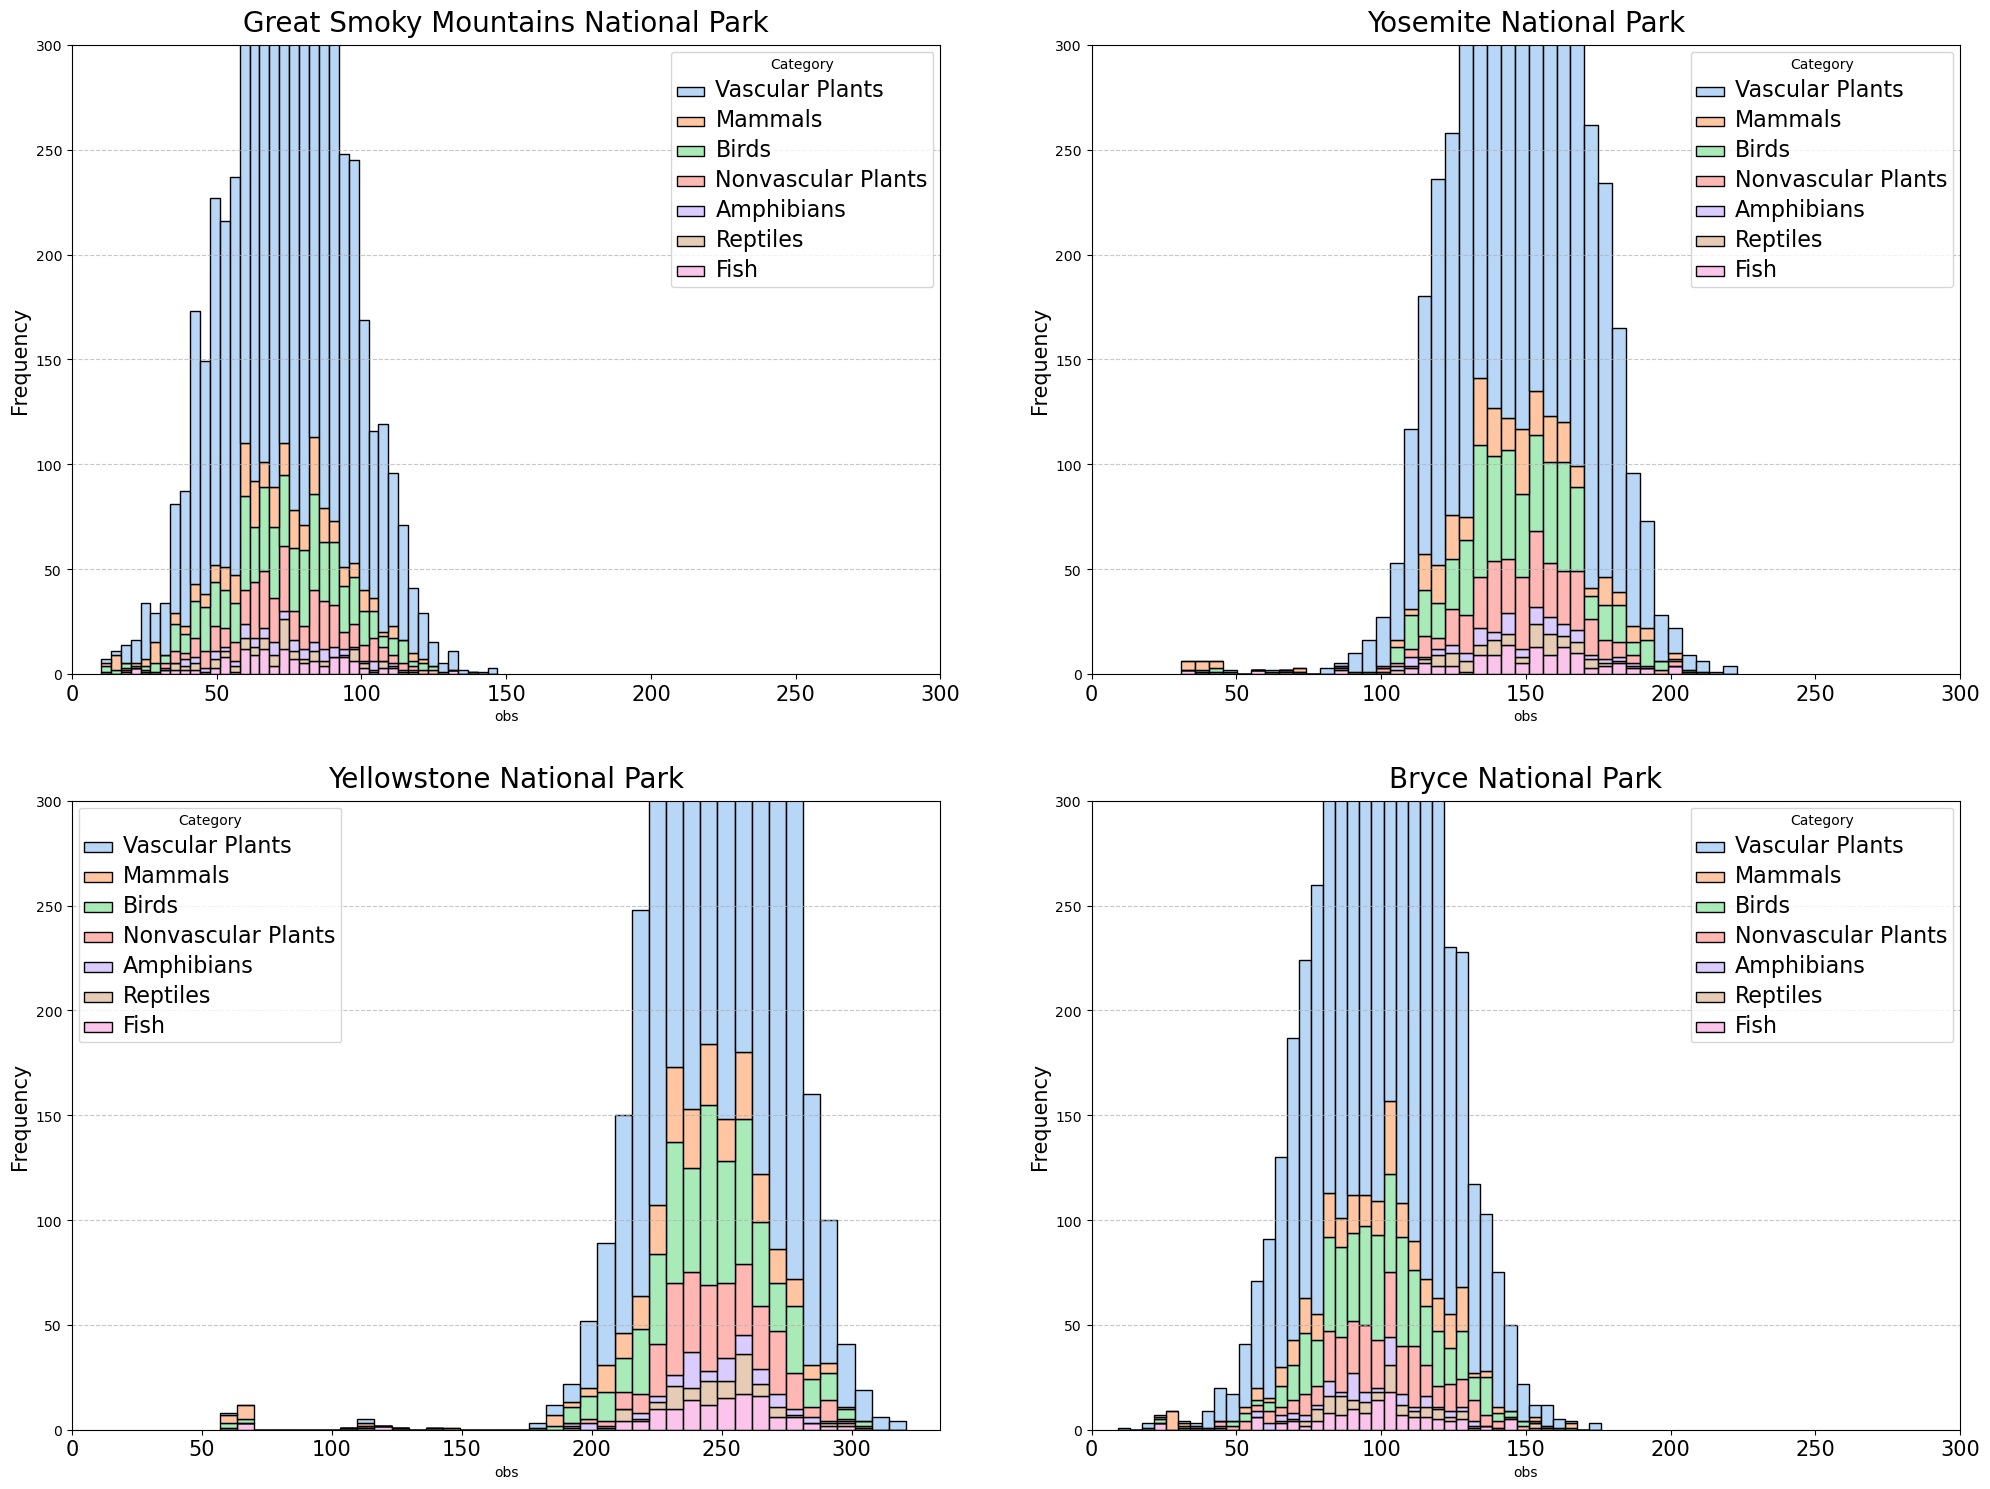

In [3]:
plt.figure(figsize=(20, 15))

for i, park in enumerate(park_list):
    plt.subplot(2, 2, i + 1)
        

    park_df = merge_df[merge_df.park == park]
    sns.histplot(data=park_df, x='obs', hue='category', bins=40, multiple="stack", palette=custom_palette)
    plt.title(park, fontsize=20, pad=10)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(list(range(0, 350, 50)), fontsize=15)
    
    current_legend = plt.gca().get_legend()
    if current_legend:
        current_legend.set_title("Category")
        for text in current_legend.texts:
            text.set_fontsize(16)
            
        plt.ylim(bottom=0, top=300)  
        plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(h_pad=3, w_pad=5)  # Adjust the spacing between subplots

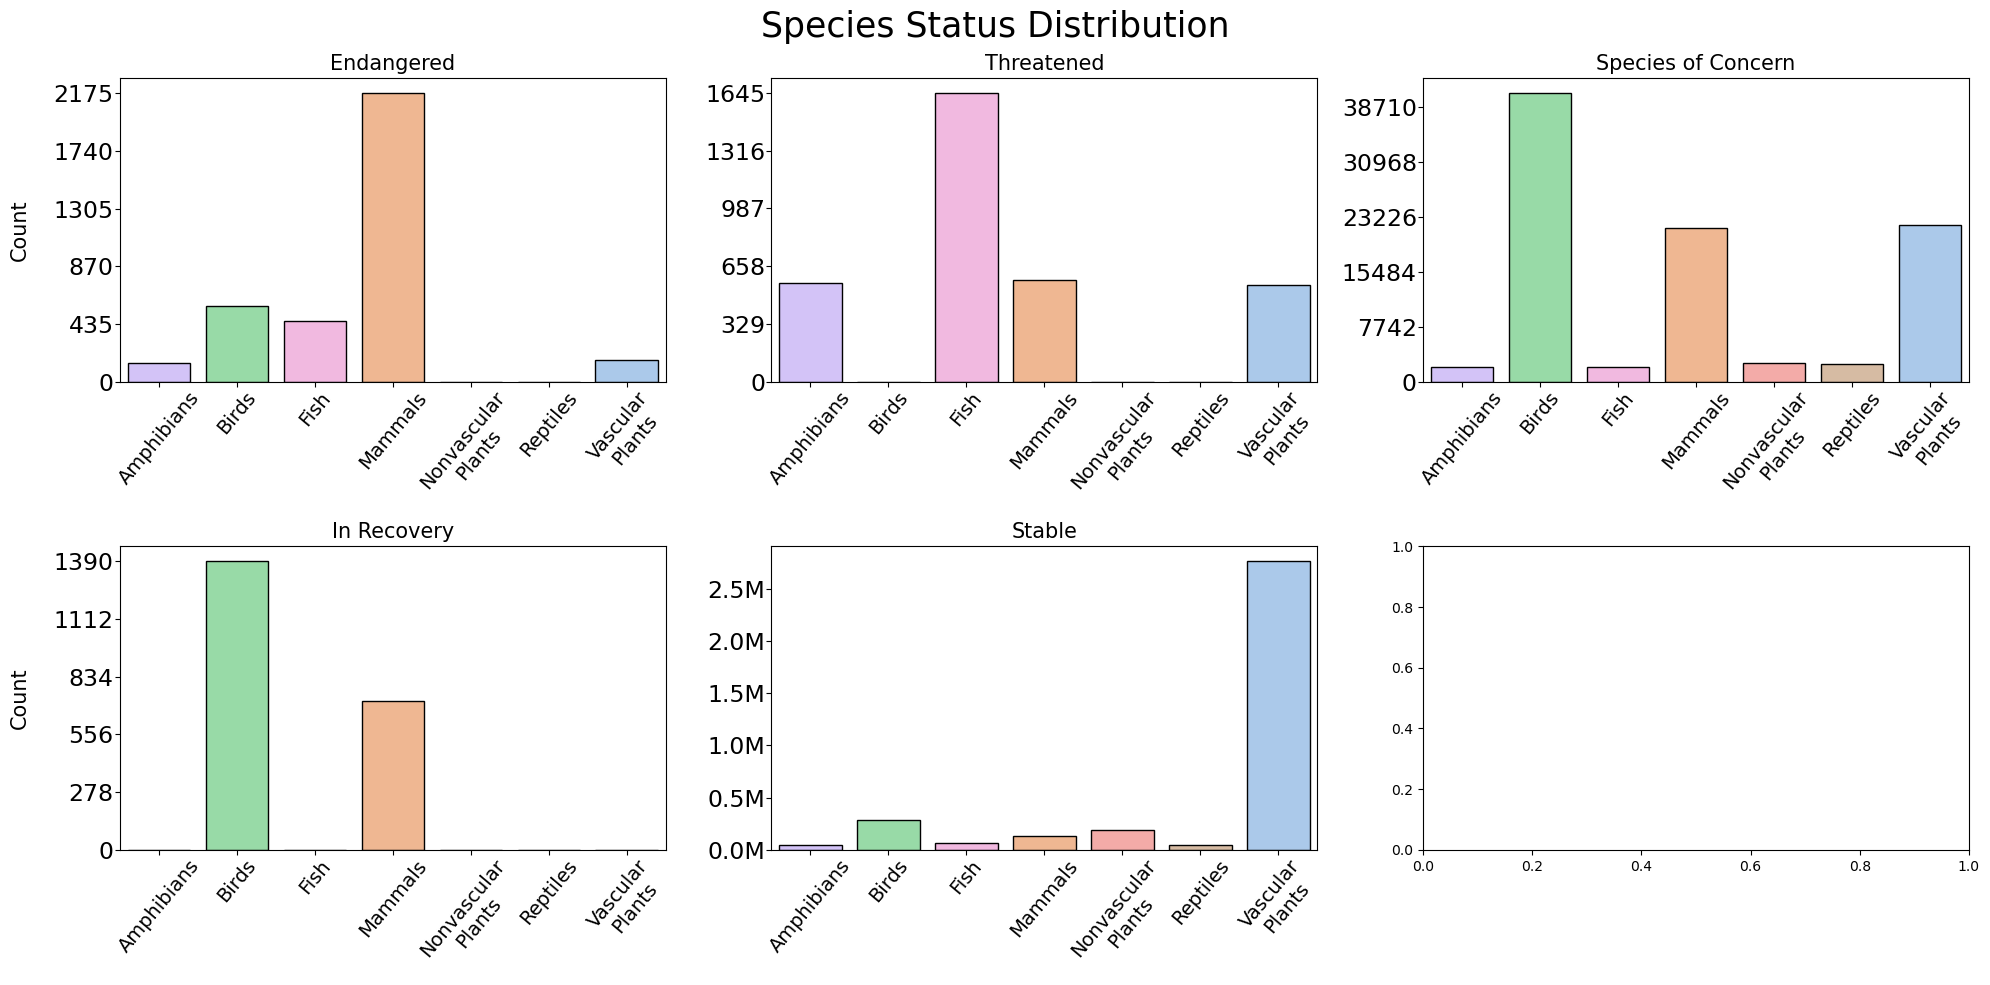

In [42]:
# What is the distribution of conservation status for species?

cat_group = merge_df.groupby(['category', 'status']).obs.sum().reset_index()

stat_list = cat_group.status.unique().tolist()
adj_cat = []
for cat in cat_group.category.unique():
    adj_cat.append(cat.replace(" ",'\n'))
    
def ytick(data, column, num):
    max_count = np.max(data[column])
    min_count = np.min(data[column])
    count_dif = max_count - min_count
    yticks = list(range(0, max_count + 1, int(count_dif / num)))
    return yticks

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, s in enumerate(stat_list):
    
    row = i // 3  # Determine the row index for the subplot
    col = i % 3   # Determine the column index for the subplot

    stat_df = cat_group[cat_group.status == s]
    sns.barplot(x='category', y='obs', data=stat_df, edgecolor='black', ax=axs[row, col], palette= custom_palette)
    axs[row, col].set_xlabel('')
    if i == 1 or i == 2 or i ==4:
        axs[row, col].set_ylabel('')
    else:
        axs[row, col].set_ylabel('Count', labelpad=17, fontsize=15)
    axs[row, col].set_title(s, fontsize=15)
    axs[row, col].tick_params(axis='x', rotation=50, labelsize=14, pad=1)
    axs[row, col].tick_params(axis='y', labelsize=17, pad=1)
    axs[row, col].set_xticklabels(adj_cat)
    max_count = np.max(stat_df['obs'])
    y_num = 5
    if max_count >= 1e6:
        formatter = mticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x * 1e-6))
        axs[row, col].yaxis.set_major_formatter(formatter)
    else:
        axs[row, col].set_yticks(ytick(stat_df, 'obs', y_num))

fig.suptitle('Species Status Distribution', fontsize=25)

plt.tight_layout()
plt.show()

In [5]:
# Mammals take the lead in the Endangered statuses, where as Birds are much more prominent 
# overall in the protected status

# Vascular plants hold the majority in Stability

In [6]:
# Are certain types of species more likely to be endangered?

species_list = merge_df.category.unique().tolist()
group_list = []
for value in species_list:
    species_df = merge_df[merge_df.category == value]
    species_df = species_df.drop_duplicates(subset=['name'])
    group_species = species_df.groupby('status').name.count().reset_index()
    group_species['category'] = value
    group_list.append(group_species)
concat_df = pd.concat(group_list)

concat_df = concat_df.rename(columns={'name': 'count'})

pivot_df = concat_df.pivot(index='category', columns='status', values='count')
pivot_df = pivot_df.fillna(0)

concat_df = pivot_df.reset_index().melt(id_vars='category', var_name='status', value_name='count')

concat_df['count'] = concat_df['count'].astype(int)

protected_df = concat_df[concat_df.status != 'Stable']
protected_df = protected_df.groupby('category')['count'].sum().reset_index()

endanger_df = concat_df[concat_df.status == 'Endangered']
endanger_df = endanger_df.groupby('category')['count'].sum().reset_index()

def data_merge(data):
    merge_row = data.loc[[5, 4]]
    merged_row_category = f"{merge_row['category'].iloc[0]} / {merge_row['category'].iloc[1]}"
    merged_row_count = merge_row['count'].sum()

    merged_row_df = pd.DataFrame([[merged_row_category, merged_row_count]], columns=['category', 'count'])
    data = data.drop([4,5])
    data = pd.concat([data, merged_row_df]).reset_index(drop=True)
    return data

protected_df = data_merge(protected_df)
endanger_df = data_merge(endanger_df)

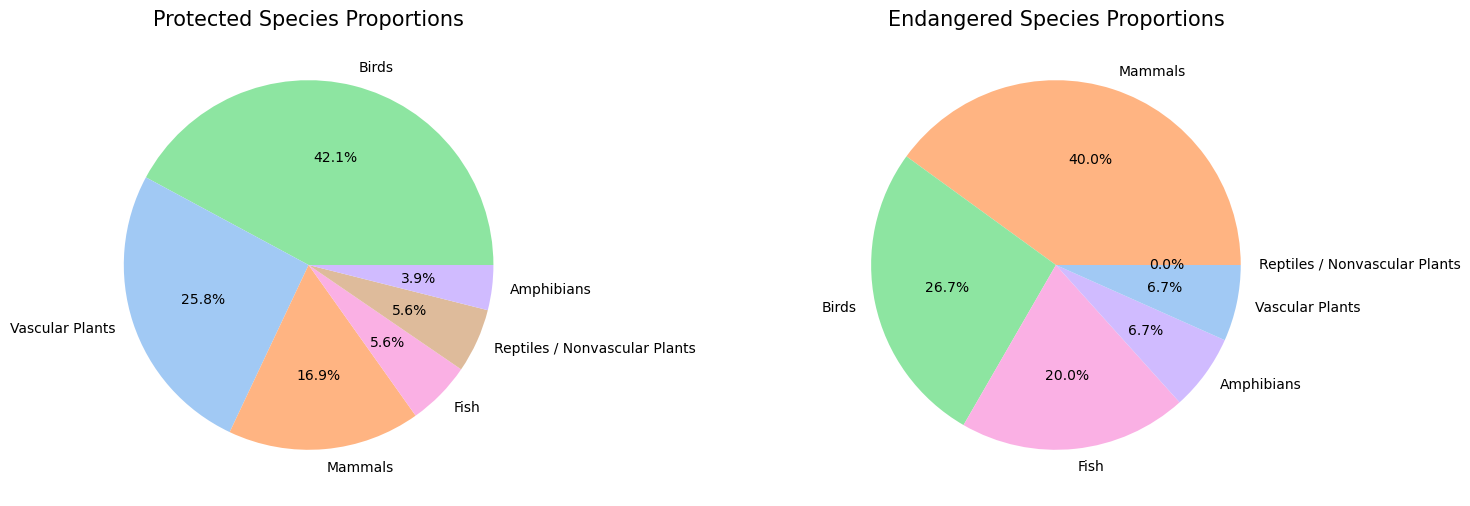

In [7]:
def pie(data):
    total_column = 'count' if 'count' in data.columns else 'obs'
    total = data[total_column].sum()
    prop = (data[total_column] / total) * 100

    sorted_data = data.sort_values(by=total_column, ascending=False)
    sorted_labels = sorted_data['category'].tolist()
    sorted_prop = prop[sorted_data.index].tolist()

    return sorted_labels, sorted_prop

protect_vals = pie(protected_df)
endanger_vals = pie(endanger_df)

# Create custom palette for sorted values

check_list=[]
for i, key in enumerate(custom_palette):
    if i == 3 or i == 5:
        continue
    else:
        check_list.append(key)

def palette_time(data):
    sorted_palette = []
    for i, val in enumerate(data[0]):
        if i > 4:
            sorted_palette.append(custom_palette['Reptiles'])
        if val in check_list:
            sorted_palette.append(custom_palette[val])
    return sorted_palette
            
sorted_palette1 = palette_time(protect_vals)
sorted_palette2 = palette_time(endanger_vals)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.axis('equal')
ax1.pie(protect_vals[1], labels=protect_vals[0], autopct='%1.1f%%', colors=sorted_palette1)
ax1.set_title('Protected Species Proportions', fontsize=15)


ax2.axis('equal')
ax2.pie(endanger_vals[1], labels=endanger_vals[0], autopct='%1.1f%%', colors=sorted_palette2)
ax2.set_title('Endangered Species Proportions', fontsize=15)

plt.subplots_adjust(wspace=0.8)


In [8]:
# Birds show a higher chance for being in a protected status, while Mammals are the most likely to be in an endangered status.
# Vascular plants are a large portion for protected speices, but has an overall a population that is nearly 10 time larger than the next largest species population.

#Although birds make up the majority of the protected species, Mammals have a greater presence in the Endangered category.

In [9]:
# Are the differences between species and their conservation status significant?

# Null Hypothesis: The difference between species and their conservation status is not statistically significant

# Alt Hypothesis: The difference between species and their conservation status is statistically significant

merge_df['protected'] = merge_df.apply(lambda row: 'Yes' if row['status'] != 'Stable' else 'No', axis=1)

Threshold = 0.05 #95% Confidence
contingency_table = pd.crosstab(merge_df['protected'], merge_df['category'])
display(contingency_table)

category,Amphibians,Birds,Fish,Mammals,Nonvascular Plants,Reptiles,Vascular Plants
protected,,,,,,,
No,300,2013,476,966,1312,304,19350
Yes,28,348,48,232,20,20,184


In [10]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [11]:
print("Chi-Square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(np.round(expected),1)

Chi-Square value: 2290.5491452046435
P-value: 0.0
Degrees of freedom: 6
Expected frequencies table:
[[3.1700e+02 2.2800e+03 5.0600e+02 1.1570e+03 1.2860e+03 3.1300e+02
  1.8863e+04]
 [1.1000e+01 8.1000e+01 1.8000e+01 4.1000e+01 4.6000e+01 1.1000e+01
  6.7100e+02]] 1


In [12]:
# Our chi2 test suggests a significant association between species and their conservation status

In [13]:
 # Which animal is most prevalent and what is their distribution amongst parks?

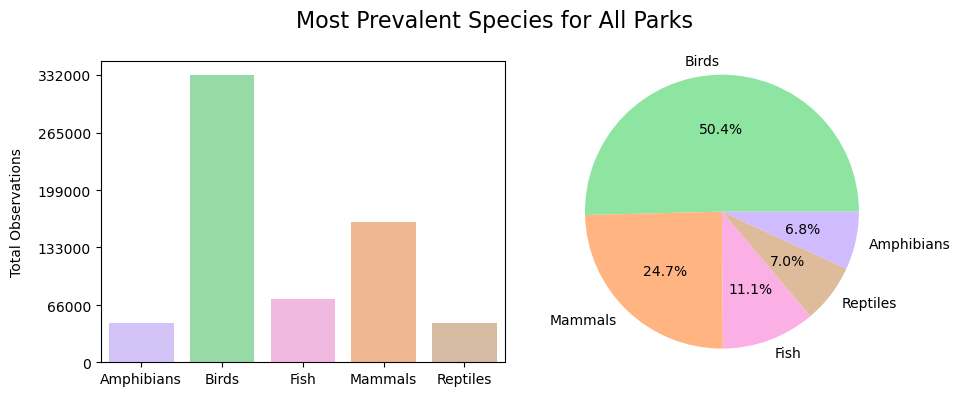

<Figure size 640x480 with 0 Axes>

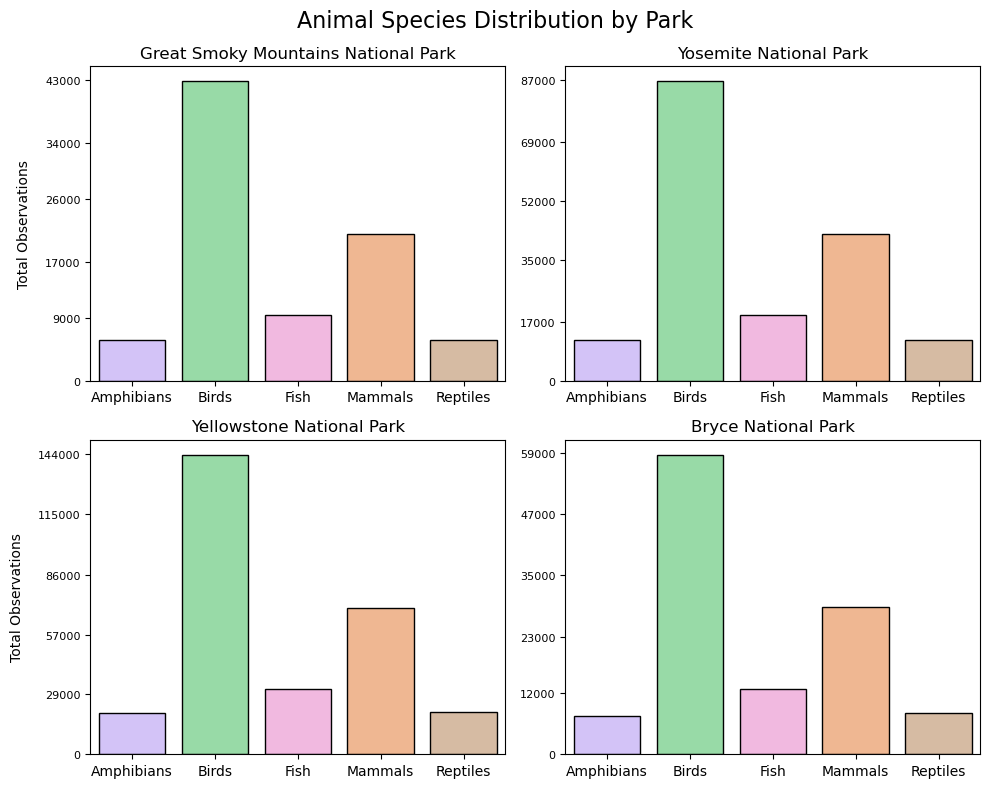

In [39]:
no_plant = merge_df[(merge_df['category'] != 'Nonvascular Plants') & (merge_df['category'] != 'Vascular Plants')]


all_animals = no_plant.groupby('category').obs.sum().reset_index()
animal_vals = pie(all_animals)

def color_sort(data, check_list, palette):
    sorted_palette = []
    for val in data[0]:
        if val in check_list:
            sorted_palette.append(palette[val])
    return sorted_palette     


pie_color = color_sort(animal_vals, all_animals.category.unique(), custom_palette)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

obs_max = np.max(all_animals['obs'])
sns.barplot(x='category', y='obs', data=all_animals, palette = custom_palette, ax=axes[0])
axes[0].set_xlabel('')
tick_interval = obs_max / 5
yticks_rounded = [round(obs_max - i * tick_interval, -3) for i in range(6)]
axes[0].set_yticks(yticks_rounded)
axes[0].set_ylabel('Total Observations', labelpad=10)


axes[1].pie(x=animal_vals[1], labels=animal_vals[0], autopct='%1.1f%%', colors = pie_color)
axes[1].axis('equal')
axes[1].set_ylabel('')

fig.suptitle("Most Prevalent Species for All Parks", fontsize=16)

plt.tight_layout()
plt.show()
plt.clf()


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, park in enumerate(park_list):
    ax = axes[i // 2, i % 2]  
    park_df = no_plant[no_plant.park == park]
    park_df = park_df.groupby('category').obs.sum().reset_index()
    obs_max = np.max(park_df.obs)
    tick_interval = obs_max / 5
    yticks_rounded = [round(obs_max - i * tick_interval, -3) for i in range(6)]
    sns.barplot(x='category', y='obs', data=park_df, palette = custom_palette, edgecolor = 'black', ax=ax)
    ax.set_title(park)
    ax.set_xlabel('')
    ax.set_yticks(yticks_rounded)
    ax.tick_params(axis='y', labelsize=8)
    fig.suptitle("Animal Species Distribution by Park", fontsize=16)
    if i == 1 or i == 3:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Total Observations', labelpad = 10)

plt.tight_layout()
plt.show()

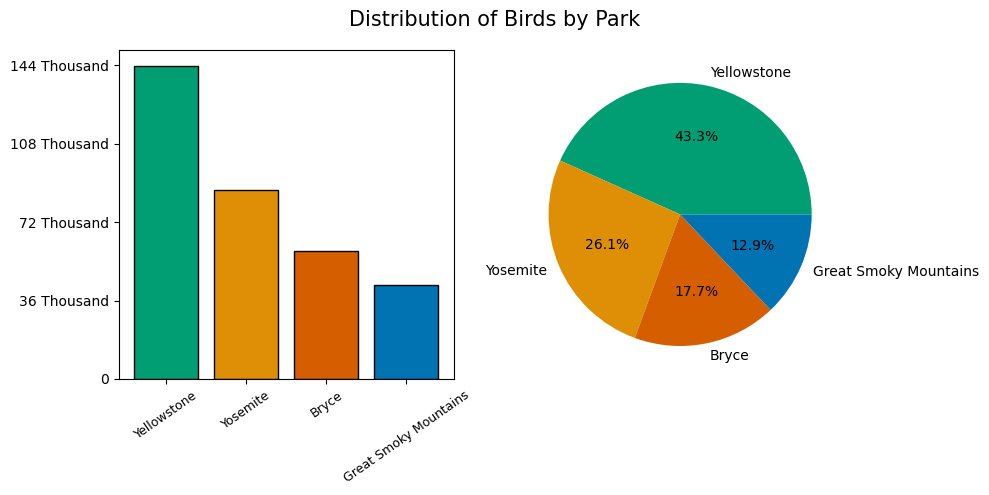

In [80]:
bird_df = merge_df[merge_df.category == 'Birds']
park_group = bird_df.groupby('park').obs.sum().reset_index()

park_group.rename(columns={'park': 'category'}, inplace=True)

park_vals = pie(park_group)
sorted_palette = color_sort(park_vals, park_list, custom_palette2)

adj_park = [park.replace("National Park", "").strip() if "Mountains" not in park else park.replace("National Park", "").strip() for park in park_vals[0]]
val_adj = [round(val / 100 * 331606) for val in park_vals[1]]
y_num = 3
yticks = ytick(park_group, 'obs', y_num)
y_adj = [round(tick * 1.07) for tick in yticks]
y_format = ["{:.0f}{}".format(value / 1000, " Thousand" if value >= 1000 else "") for value in test]


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = axes[1]
ax2 = axes[0]
ax1.pie(park_vals[1], labels=adj_park, autopct='%1.1f%%', colors = sorted_palette)

ax2.bar(adj_park, val_adj, data=park_group, color = sorted_palette, edgecolor='black')
ax2.tick_params(axis='x', labelsize=9, rotation = 35)

ax2.set_yticks(y_adj)
ax2.set_yticklabels(y_format)

fig.suptitle("Distribution of Birds by Park", fontsize=15, ha='center')

plt.tight_layout()